# Evaluate Decima's performance on held-out genes

In [2]:
import numpy as np
import pandas as pd
import anndata
import os
from grelu.visualize import plot_distribution
from plotnine import *
%matplotlib inline

## Paths

In [3]:
save_dir="/gstore/data/resbioai/grelu/decima/20240823"
matrix_file = os.path.join(save_dir, "data.h5ad")
h5_file = os.path.join(save_dir, "data.h5")

## Load data

In [4]:
ad = anndata.read_h5ad(matrix_file)

In [5]:
for dataset in ad.var.dataset.unique():
    print(dataset)
    print(ad.var.loc[ad.var.dataset==dataset, 'pearson'].mean().round(2))
    print(ad.var.loc[ad.var.dataset==dataset, 'size_factor_pearson'].mean().round(2))
    print(ad.obs[f"{dataset}_pearson"].mean().round(2))

train
0.67
0.28
0.9
val
0.59
0.32
0.79
test
0.58
0.31
0.8


## Plot correlations on test genes

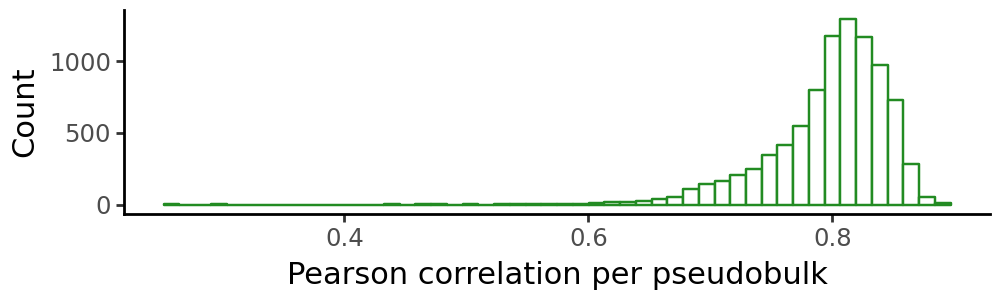

In [6]:
(
    ggplot(ad.obs, aes(x="test_pearson"))
    + geom_histogram(fill="white", color="forestgreen", bins=50)
    + theme_classic() + theme(figure_size=(5,1.5))
    + xlab("Pearson correlation per pseudobulk")
    + ylab("Count")
)

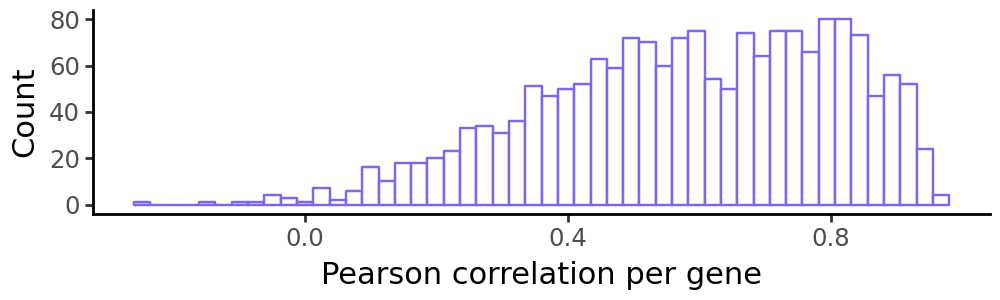

In [7]:
(
    ggplot(ad.var[ad.var.dataset=="test"], aes(x="pearson"))
    + geom_histogram(fill="white", color="mediumslateblue", bins=50)
    + theme_classic() + theme(figure_size=(5,1.5))
    + xlab("Pearson correlation per gene")
    + ylab("Count")
)